# Ravelin Data Science Test

Below are some json profiles representing fictional customers from an ecommerce company. The profiles contain information about the customer, their orders, their transactions, what payment methods they used and whether the customer is fraudulent or not. Your task is to:
- Transform the json profiles into a dataframe of feature vectors.
- Provide exploratory analysis of the dataset, and to summarise and explain the key trends in the data, explaining which factors appear to be most important in predicting fraud.
- Construct a model to predict if a customer is fraudulent based on their profile.
- Report on the models success and show what features are most important in that model.

In [8]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',200, 'display.max_columns',200)
import matplotlib.pyplot as plt

In [9]:
df = pd.read_json('customers.json', lines=True)
df.head(2)

,fraudulent,customer,orders,paymentMethods,transactions
0,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."


## EDA
### Customer
- We have seen from looking at the customer details, that if any of these details are used across different customer accounts, they are likely to be fraudulent.
- So we can create a flag that checks to see if any of the customer details have been duplicated, to use as a feature.

In [10]:
cust = pd.concat([df['fraudulent'], pd.json_normalize(df['customer'])], axis=1)
cust.insert(1, 'email_duped', cust.customerEmail.duplicated())
cust.insert(2, 'phone_duped', cust.customerPhone.duplicated())
cust.insert(3, 'device_duped', cust.customerDevice.duplicated())
cust.insert(4, 'ipaddress_duped', cust.customerIPAddress.duplicated())
cust.insert(5, 'billingaddress_duped', cust.customerBillingAddress.duplicated())
cust.insert(6, 'customer_duped', cust.apply(lambda x: np.sum(x.iloc[1:5]), axis=1))
cust.drop(columns=['email_duped', 'phone_duped', 'device_duped', 'ipaddress_duped', 'billingaddress_duped'],
          inplace=True)
df.insert(1, 'customer_duped', cust.customer_duped)
df.head()

,fraudulent,customer_duped,customer,orders,paymentMethods,transactions
0,False,0,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,True,0,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,False,0,"{'customerEmail': 'andersonwilliam@yahoo.com',...","[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,False,0,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...","[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,True,0,"{'customerEmail': 'uchen@malone.com', 'custome...","[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


In [11]:
df_norm = df.explode('orders').explode('paymentMethods').explode('transactions').reset_index().rename(columns={'index':'customerId'})
df_norm = pd.json_normalize(json.loads(df_norm.to_json(orient='records'))).drop(columns=['orders','transactions','paymentMethods'])
df_norm.head()

,customerId,fraudulent,customer_duped,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,orders.orderId,orders.orderAmount,orders.orderState,orders.orderShippingAddress,paymentMethods.paymentMethodId,paymentMethods.paymentMethodRegistrationFailure,paymentMethods.paymentMethodType,paymentMethods.paymentMethodProvider,paymentMethods.paymentMethodIssuer,transactions.transactionId,transactions.orderId,transactions.paymentMethodId,transactions.transactionAmount,transactions.transactionFailed
0,0,False,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18.0,False
1,0,False,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,y4wcv03i,yp6x27,wt07xm68b,26.0,False
2,0,False,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18.0,False
3,0,False,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,y4wcv03i,yp6x27,wt07xm68b,26.0,False
4,1,True,0,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45.0,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,5mi94sfw,nlghpa,41ug157xz,45.0,False


- We have now normalized the nested JSON architecture into a Pandas DataFrame, and added a flag to indicate customer duplication and a unique identifier for each customer record to allow analysis at the customer-level.

### Orders

In [12]:
orders = df[['fraudulent','customer','orders']]
orders = orders.explode('orders').reset_index().rename(columns={'index':'customerId'})
orders = pd.json_normalize(json.loads(orders.to_json(orient='records'))).drop(columns=['orders'])

orders.head()

,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,orders.orderId,orders.orderAmount,orders.orderState,orders.orderShippingAddress
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45.0,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23.0,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,bn44oh,43.0,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [13]:
orders.groupby(['orders.orderState','fraudulent']).agg({'orders.orderId':'count',
                                                        'orders.orderAmount':'sum'})

orders.orderId  orders.orderAmount
orders.orderState fraudulent                                    
failed            False                   27               837.0
                  True                    23               986.0
fulfilled         False                  223              6486.0
                  True                   177              7712.0
pending           False                   17               517.0
                  True                    11               482.0

- Order State doesn't seem to be a predictor of whether an order is fraudulent, the count of orderID per state is roughly the same for both Fraudulent and non-Fraudulent customers

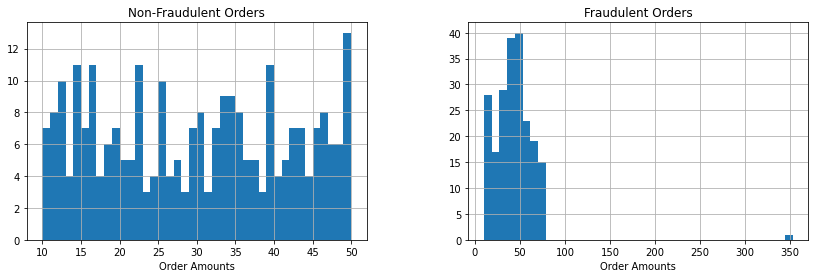

In [14]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
orders[orders.fraudulent == False].hist('orders.orderAmount', bins=40, ax=ax[0])
orders[orders.fraudulent == True].hist('orders.orderAmount', bins=40, ax=ax[1])
ax[0].set_title('Non-Fraudulent Orders')
ax[0].set_xlabel('Order Amounts')
ax[1].set_title('Fraudulent Orders')
ax[1].set_xlabel('Order Amounts');

- The Order Amount on Orders placed by Fraudulent customers are much larger, it appears that non-Fraudulent were restricted to smaller order amount, ie. < 50.
- We add 2 columns here: avg and max order amount per customer to serve as features for our model

In [15]:
orders.head()

,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,orders.orderId,orders.orderAmount,orders.orderState,orders.orderShippingAddress
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18.0,pending,"5493 Jones Islands\nBrownside, CA 51896"
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26.0,fulfilled,"5493 Jones Islands\nBrownside, CA 51896"
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45.0,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497"
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,uw0eeb,23.0,fulfilled,356 Elizabeth Inlet Suite 120\nPort Joshuabury...
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,bn44oh,43.0,fulfilled,"5093 Bryan Forks\nJoshuaton, FM 01565-9801"


In [16]:
order_amount = orders.groupby('customerId').agg({'orders.orderAmount':[np.average,np.max]}).droplevel(0, axis=1)
order_amount.rename(columns={'average':'orderamount_avg','amax':'orderamount_max'}, inplace=True)
order_amount.head()

,orderamount_avg,orderamount_max
customerId,,
0,22.000000,26.0
1,37.000000,45.0
2,27.333333,33.0
3,28.333333,34.0
4,58.714286,71.0


In [17]:
orders['sameAsBilling'] = orders.apply(lambda x: True if (x['customer.customerBillingAddress']==x['orders.orderShippingAddress']) else False,
                                       axis=1)
orders.groupby(['sameAsBilling','fraudulent']).agg({'orders.orderId':'count',
                                                    'orders.orderAmount':'sum'})

orders.orderId  orders.orderAmount
sameAsBilling fraudulent                                    
False         False                   69              1965.0
              True                    81              3402.0
True          False                  198              5875.0
              True                   130              5778.0

- Whether or not the customer billing address was the same as order shipping address didn't appear to have a bearing on whether an order was fraudulent

### Payment Methods

In [18]:
payment = df[['fraudulent','customer','paymentMethods']]
payment = payment.explode('paymentMethods').reset_index().rename(columns={'index':'customerId'})
payment = pd.json_normalize(json.loads(payment.to_json(orient='records'))).drop(columns=['paymentMethods'])

payment.head()

,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,paymentMethods.paymentMethodId,paymentMethods.paymentMethodRegistrationFailure,paymentMethods.paymentMethodType,paymentMethods.paymentMethodProvider,paymentMethods.paymentMethodIssuer
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks
1,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,6krszxc05,False,card,VISA 16 digit,Vertex Bancorp
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5z1szj2he,False,card,Diners Club / Carte Blanche,His Majesty Bank Corp.
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,m52tx8e1s,False,card,Mastercard,Vertex Bancorp


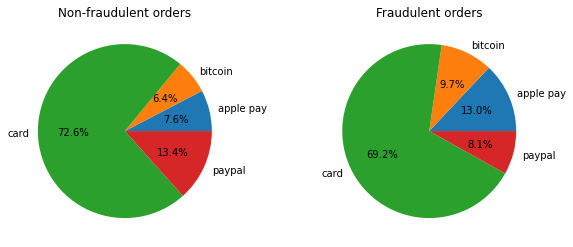

In [19]:
payment_genuine = payment[payment['fraudulent'] == False]
payment_fraud = payment[payment['fraudulent'] == True]

fig, ax = plt.subplots(1,2,figsize=(10,4))
method = payment_genuine.groupby('paymentMethods.paymentMethodType').agg({'paymentMethods.paymentMethodId':'count'})
ax[0].pie(method['paymentMethods.paymentMethodId'], labels=method.index, autopct='%1.1f%%')
ax[0].set_title('Non-fraudulent orders')
method = payment_fraud.groupby('paymentMethods.paymentMethodType').agg({'paymentMethods.paymentMethodId':'count'})
ax[1].pie(method['paymentMethods.paymentMethodId'], labels=method.index, autopct='%1.1f%%')
ax[1].set_title('Fraudulent orders');

In [20]:
payment_fraud.groupby(['fraudulent','paymentMethods.paymentMethodIssuer'])\
.agg({'paymentMethods.paymentMethodId':'count'})

paymentMethods.paymentMethodId
fraudulent paymentMethods.paymentMethodIssuer                                
True                                                                        2
           B                                                                7
           Bastion Banks                                                   17
           Bulwark Trust Corp.                                             15
           Citizens First Banks                                            14
           Fountain Financial Inc.                                         21
           Grand Credit Corporation                                        10
           Her Majesty Trust                                               19
           His Majesty Bank Corp.                                          17
           Rose Bancshares                                                 12
           Solace Banks                                                    12
           Vertex Bancorp                                                  19
           a                                                                1
           c                                                                4
           e                                                                5
           n                                                                2
           o                                                                2
           p                                                                1
           r                                                                3
           x                                                                2

- Payment Methods offers little in predicting Fraud however, it does appear that when paymentMethodIssuer isn't populated with a legitimate Issuer then the payment is likely to be fraudulent.
- We should create a flag to highlight where a customer has payments with incorrect issuer details

In [21]:
issuer_list = payment_genuine['paymentMethods.paymentMethodIssuer'].dropna().unique()
payment['validIssuer'] = payment['paymentMethods.paymentMethodIssuer'].isin(issuer_list)
valid_payment = payment[payment['validIssuer']==False].groupby('customerId').agg({'paymentMethods.paymentMethodId':'count'})
valid_payment.rename(columns={'paymentMethods.paymentMethodId':'num_invalidIssuer'}, inplace=True)
valid_payment.head()

,num_invalidIssuer
customerId,
5,2
6,2
10,1
15,1
23,1


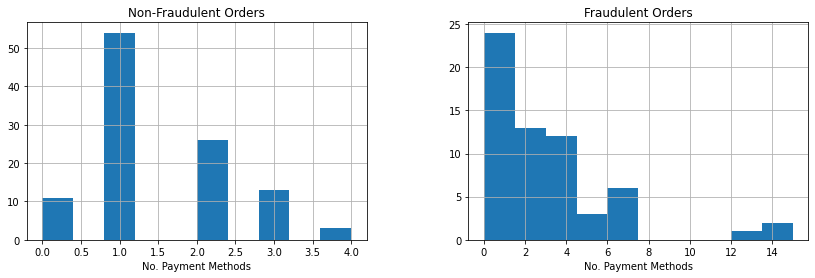

In [22]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
payment_genuine.groupby('customerId').agg({'paymentMethods.paymentMethodId':pd.Series.nunique}).hist(ax=ax[0])
payment_fraud.groupby('customerId').agg({'paymentMethods.paymentMethodId':pd.Series.nunique}).hist(ax=ax[1])
ax[0].set_title('Non-Fraudulent Orders')
ax[0].set_xlabel('No. Payment Methods')
ax[1].set_title('Fraudulent Orders')
ax[1].set_xlabel('No. Payment Methods');

- Some relationship appears to exist between Fraudulence, and a higher number of payment methods per customer. A field will be added to indicate number of unique payment methods for each customer.

In [23]:
payment_methods = payment.groupby('customerId').agg({'paymentMethods.paymentMethodId':pd.Series.nunique})
payment_methods.rename({'paymentMethods.paymentMethodId':'num_paymentmethods'}, inplace=True)

### Transactions

In [24]:
transactions = df[['fraudulent','customer','transactions']]
transactions = transactions.explode('transactions').reset_index().rename(columns={'index':'customerId'})
transactions = pd.json_normalize(json.loads(transactions.to_json(orient='records'))).drop(columns=['transactions'])

transactions.head()

,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,transactions.transactionId,transactions.orderId,transactions.paymentMethodId,transactions.transactionAmount,transactions.transactionFailed
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,vjbdvd,wt07xm68b,18.0,False
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,yp6x27,wt07xm68b,26.0,False
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5mi94sfw,nlghpa,41ug157xz,45.0,False
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,uw0eeb,41ug157xz,23.0,False
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,a33145ss,bn44oh,y3xp697jx,43.0,True


In [25]:
transactions.groupby(['transactions.transactionFailed','fraudulent'])\
.agg({'transactions.transactionId':'count', 'transactions.transactionAmount':'sum'})

transactions.transactionId  \
transactions.transactionFailed fraudulent                               
False                          False                              258   
                               True                               197   
True                           False                              108   
                               True                                60   

                                           transactions.transactionAmount  
transactions.transactionFailed fraudulent                                  
False                          False                               7560.0  
                               True                                8169.0  
True                           False                               3072.0  
                               True                                2754.0

- Whether or not a transaction failed seems to be a some indication of that customer being fraudulent, it's a weak indicator but for transactions that failed most of them were fraudulent.

In [26]:
transactions.head()

,customerId,fraudulent,customer.customerEmail,customer.customerPhone,customer.customerDevice,customer.customerIPAddress,customer.customerBillingAddress,transactions.transactionId,transactions.orderId,transactions.paymentMethodId,transactions.transactionAmount,transactions.transactionFailed
0,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",a9lcj51r,vjbdvd,wt07xm68b,18.0,False
1,0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",y4wcv03i,yp6x27,wt07xm68b,26.0,False
2,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,5mi94sfw,nlghpa,41ug157xz,45.0,False
3,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,br8ba1nu,uw0eeb,41ug157xz,23.0,False
4,1,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,a33145ss,bn44oh,y3xp697jx,43.0,True


In [27]:
num_failed_transaction = transactions[transactions['transactions.transactionFailed']==True].groupby(['customerId']).agg({'transactions.transactionId':'count'})
num_failed_transaction.rename(columns={'transactions.transactionId':'num_failedtransaction'}, inplace=True)
num_failed_transaction.head()

,num_failedtransaction
customerId,
1,1
2,2
4,2
6,1
7,2


### Order volumes
- How many orders did fraudulent customers make vs. genuine customers, e.g. were fraudulent customers likely to attempt more orders?

In [28]:
orders_genuine = orders[orders['fraudulent']==False].groupby('customerId').agg({'orders.orderId':'count'})
orders_fraud = orders[orders['fraudulent']==True].groupby('customerId').agg({'orders.orderId':'count'})

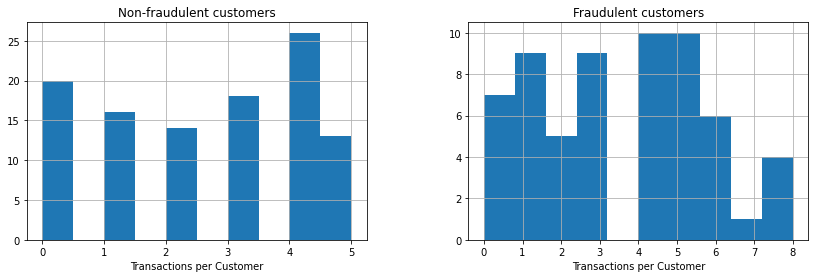

In [30]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
orders_genuine.hist(ax=ax[0])
ax[0].set_title('Non-fraudulent customers')
ax[0].set_xlabel('Transactions per Customer')
orders_fraud.hist(ax=ax[1])
ax[1].set_title('Fraudulent customers')
ax[1].set_xlabel('Transactions per Customer');

- There appears a slight bias towards a higher number of orders for fraudulent customers than for non-fraudulent customers. So we will add no.orders per customer as a feature.

In [31]:
num_orders = orders.groupby('customerId').agg({'orders.orderId':'count'})

### Transaction volumes
- How many transactions did fraudulent customers make vs. genuine customers, e.g. were fraudulent customers likely to attempt more transactions?

In [32]:
transactions_genuine = transactions[transactions['fraudulent']==False].groupby('customerId').agg({'transactions.transactionId':'count'})
transactions_fraud = transactions[transactions['fraudulent']==True].groupby('customerId').agg({'transactions.transactionId':'count'})

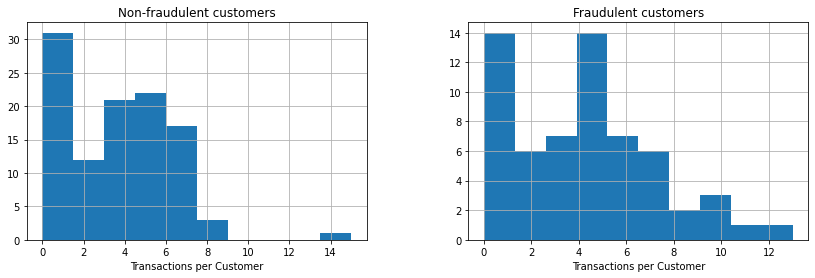

In [33]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
transactions_genuine.hist(ax=ax[0])
ax[0].set_title('Non-fraudulent customers')
ax[0].set_xlabel('Transactions per Customer')
transactions_fraud.hist(ax=ax[1])
ax[1].set_title('Fraudulent customers')
ax[1].set_xlabel('Transactions per Customer');

- Similarly to order volumes, there appears a slight bias towards a higher number of transactions for fraudulent customers than for non-fraudulent customers. So we will add no.transactions per customer as a feature.

In [34]:
num_transactions = transactions.groupby('customerId').agg({'transactions.transactionId':'count'})

### EDA summary:
- Replication of customer details across different accounts indicates fraud: a flag has been created.
- Large Order Amounts seem to indicate fraud, particularly beyond a threshold: we have indicated the avg and max order amount per customer.
- Where no valid Payment Method issuer was given this has been exclusively associated with fraudulent accounts: a flag will be created.
- Failed transactions have been slightly skewed towards fraudulent accounts: this feature could help our model.
- Fraudulent customers may have slightly higher no. orders and transactions than genuine customers: worth also adding two fields, one for each count

## Feature Engineering
- We now create the necessary features outlined above.

In [35]:
features = df_norm[['fraudulent','customerId','customer_duped']].drop_duplicates('customerId', ignore_index=True)
features.head()

,fraudulent,customerId,customer_duped
0,False,0,0
1,True,1,0
2,False,2,0
3,False,3,0
4,True,4,0


Add order and transaction volumes per customer:

In [36]:
features = features.join(num_orders, on='customerId').join(num_transactions, on='customerId')
features.rename(columns={'orders.orderId':'num_orders','transactions.transactionId':'num_transactions'}, inplace=True)
features.head()

,fraudulent,customerId,customer_duped,num_orders,num_transactions
0,False,0,0,2,2
1,True,1,0,3,3
2,False,2,0,3,5
3,False,3,0,3,3
4,True,4,0,7,7


Add average and max order amount per customer:

In [37]:
features = features.join(order_amount, on='customerId')
features[['orderamount_avg','orderamount_max']] = features[['orderamount_avg','orderamount_max']].fillna(0)
features.head()

,fraudulent,customerId,customer_duped,num_orders,num_transactions,orderamount_avg,orderamount_max
0,False,0,0,2,2,22.000000,26.0
1,True,1,0,3,3,37.000000,45.0
2,False,2,0,3,5,27.333333,33.0
3,False,3,0,3,3,28.333333,34.0
4,True,4,0,7,7,58.714286,71.0


Add flag for incomplete payment details:

In [38]:
features = features.join(valid_payment, on='customerId')
features.num_invalidIssuer = features.num_invalidIssuer.fillna(0)
features.head()

,fraudulent,customerId,customer_duped,num_orders,num_transactions,orderamount_avg,orderamount_max,num_invalidIssuer
0,False,0,0,2,2,22.000000,26.0,0.0
1,True,1,0,3,3,37.000000,45.0,0.0
2,False,2,0,3,5,27.333333,33.0,0.0
3,False,3,0,3,3,28.333333,34.0,0.0
4,True,4,0,7,7,58.714286,71.0,0.0


Add no. payment methods used per customer:

In [39]:
features = features.join(payment_methods, on='customerId').rename(columns={'paymentMethods.paymentMethodId':'num_paymentmethods'})
features.head()

,fraudulent,customerId,customer_duped,num_orders,num_transactions,orderamount_avg,orderamount_max,num_invalidIssuer,num_paymentmethods
0,False,0,0,2,2,22.000000,26.0,0.0,1
1,True,1,0,3,3,37.000000,45.0,0.0,7
2,False,2,0,3,5,27.333333,33.0,0.0,2
3,False,3,0,3,3,28.333333,34.0,0.0,1
4,True,4,0,7,7,58.714286,71.0,0.0,6


Add no. failed transactions per customer:

In [40]:
features = features.join(num_failed_transaction, on='customerId')
features.num_failedtransaction = features.num_failedtransaction.fillna(0)
features.head()

,fraudulent,customerId,customer_duped,num_orders,num_transactions,orderamount_avg,orderamount_max,num_invalidIssuer,num_paymentmethods,num_failedtransaction
0,False,0,0,2,2,22.000000,26.0,0.0,1,0.0
1,True,1,0,3,3,37.000000,45.0,0.0,7,1.0
2,False,2,0,3,5,27.333333,33.0,0.0,2,2.0
3,False,3,0,3,3,28.333333,34.0,0.0,1,0.0
4,True,4,0,7,7,58.714286,71.0,0.0,6,2.0


## Modelling

In [41]:
y, X = features.pop('fraudulent'), features.drop(columns='customerId')

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegressionCV

lrcv = LogisticRegressionCV(max_iter=10000)
lrcv.fit(X_train, y_train)
print(lrcv.score(X_test, y_test))
print(lrcv.C_)

0.8809523809523809
[0.35938137]


In [44]:
lrcv_coefficients = pd.DataFrame(lrcv.coef_,
                                 columns=X.columns,
                                 index=['coefficients']).T.sort_values('coefficients',ascending=False)
lrcv_coefficients

,coefficients
num_invalidIssuer,1.392278
customer_duped,0.873673
num_paymentmethods,0.784489
orderamount_max,0.627456
orderamount_avg,0.622270
num_orders,0.206683
num_failedtransaction,0.018978
num_transactions,-0.243552


The most important coefficients to deciding whether or not a custoer is fraudulent are:
- the number of incomplete payment details a customer has provided,
- whether or not accounts have customer details in common,
- the number of payment methods provided by a customer,
- the size of the order amounts

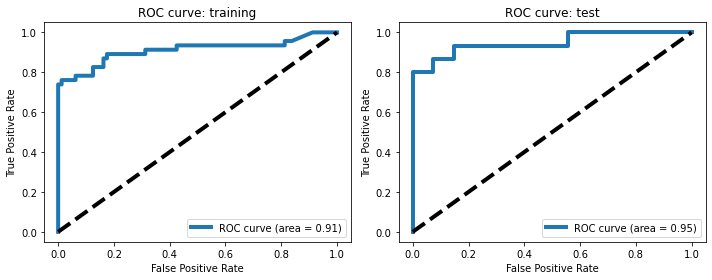

In [56]:
from sklearn.metrics import classification_report, roc_curve, auc

# ROC curve: training
y_pp = pd.DataFrame(lrcv.predict_proba(X_train), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_train, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[0].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc="lower right")
ax[0].set_title('ROC curve: training')

# ROC Curve: test
y_pp = pd.DataFrame(lrcv.predict_proba(X_test), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_test, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[1].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc="lower right")
ax[1].set_title('ROC curve: test')

plt.tight_layout();

In [46]:
print(classification_report(y_test, lrcv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.67      0.80        15

    accuracy                           0.88        42
   macro avg       0.92      0.83      0.86        42
weighted avg       0.90      0.88      0.87        42



### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
params = {'max_depth': range(2,10)}

gs_dt = GridSearchCV(dt, params)
gs_dt.fit(X_train, y_train)
print(gs_dt.best_params_)
print(gs_dt.best_score_)

{'max_depth': 5}
0.9199999999999999


In [61]:
gs_dt_coefficients = pd.DataFrame(gs_dt.best_estimator_.feature_importances_,
                                  index=X.columns,
                                  columns=['coefficients']).sort_values('coefficients',ascending=False)
gs_dt_coefficients

,coefficients
num_invalidIssuer,0.305623
orderamount_avg,0.298243
customer_duped,0.183374
num_paymentmethods,0.102900
orderamount_max,0.076012
num_orders,0.033848
num_transactions,0.000000
num_failedtransaction,0.000000


The most important features remain:
- the number of incomplete payment details a customer has provided,
- the size of the order amounts,
- whether or not accounts have customer details in common,
- the number of payment methods provided by a customer,

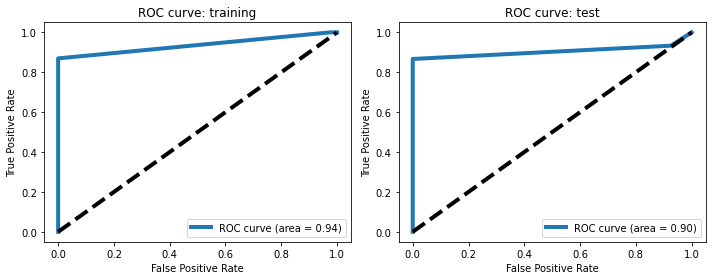

In [55]:
# ROC curve: training
y_pp = pd.DataFrame(gs_dt.predict_proba(X_train), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_train, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[0].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc="lower right")
ax[0].set_title('ROC curve: training')

# ROC Curve: test
y_pp = pd.DataFrame(gs_dt.predict_proba(X_test), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_test, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[1].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc="lower right")
ax[1].set_title('ROC curve: test')

plt.tight_layout();

In [54]:
print(classification_report(y_test, gs_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.87      0.93        15

    accuracy                           0.95        42
   macro avg       0.97      0.93      0.95        42
weighted avg       0.96      0.95      0.95        42



- Looking at the Classification Report, the DecisionTreeClassifier appears to achieve a better Recall on Fraudulent customers (label = 1), and better Precision for non-Fraudulent customers.
- It seems more of the Fraudulent customers are being correctly assigned.

### Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
params = {'learning_rate': np.linspace(.01,0.1,4),
          'max_depth': range(2,5)}

gs_gb = GridSearchCV(gb, params)
gs_gb.fit(X_train, y_train)
print(gs_gb.best_params_)
print(gs_gb.best_score_)

{'learning_rate': 0.1, 'max_depth': 2}
0.9039999999999999


In [75]:
gs_gb_coefficients = pd.DataFrame(gs_gb.best_estimator_.feature_importances_,
                                  index=X.columns,
                                  columns=['coefficients']).sort_values('coefficients',ascending=False)
gs_gb_coefficients

,coefficients
num_invalidIssuer,0.311129
orderamount_avg,0.244104
customer_duped,0.137257
num_paymentmethods,0.137088
orderamount_max,0.131792
num_failedtransaction,0.020659
num_transactions,0.013089
num_orders,0.004883


Similar order of importances as before, this time all of the features have been used in the Classifier model, whereas before 2 features had 0 importance.

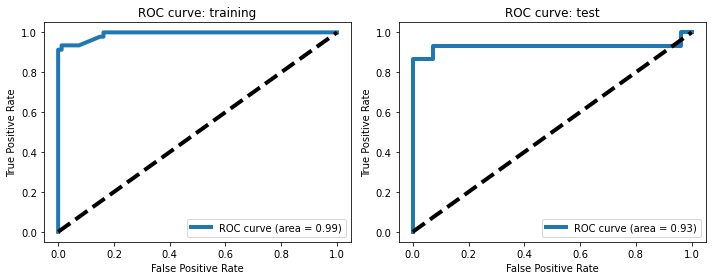

In [67]:
# ROC curve: training
y_pp = pd.DataFrame(gs_gb.predict_proba(X_train), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_train, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(ncols=2, figsize=(10,4))
ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[0].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc="lower right")
ax[0].set_title('ROC curve: training')

# ROC Curve: test
y_pp = pd.DataFrame(gs_gb.predict_proba(X_test), columns=['class_0_pp', 'class_1_pp'])
fpr, tpr, threshold = roc_curve(y_test, y_pp.class_1_pp)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
ax[1].plot([0, 1], [0, 1], 'k--', linewidth=4)
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].legend(loc="lower right")
ax[1].set_title('ROC curve: test')

plt.tight_layout();

In [66]:
print(classification_report(y_test, gs_gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.87      0.93        15

    accuracy                           0.95        42
   macro avg       0.97      0.93      0.95        42
weighted avg       0.96      0.95      0.95        42



## Conclusion

GradientBoostingClassifier appears to be the best model:
- Better ROC-AUC curves,
- Higher Precision / Recall for both classes in the Classification Report, overall > 90%
- Used all of the features unlike the Decision Tree